In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import cv2
import os
import time
from keras.applications import DenseNet121
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential,load_model
from keras.utils import to_categorical
from tensorflow import keras
from keras.layers import InputLayer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [3]:
train_folder = '/content/drive/My Drive/dataset/voilajones_ck+/'
expres_code = ['ang','dis','fea','hap','sad','sur']
#expressions = [ 0,   1,   2,   3,   4,   5]
def read_data(dir_path):
    img_names = []
    img_data_list = []
    labels = []
    img_list = os.listdir(dir_path)
    for img in img_list:
        input_img = cv2.imread(dir_path + img)
        input_img=cv2.resize(input_img,(224,224))
        img_data_list.append(input_img)
        label = img[4:7]  # each name of image have 2 char for label from index 3-5
        labels.append(expres_code.index(label))
        img_names.append(img)
    img_data = np.array(img_data_list)
    print(img_data)
    return img_data, labels, img_names

X, Y, img_names = read_data(train_folder)

[[[[ 17  17  17]
   [ 17  17  17]
   [ 21  21  21]
   ...
   [ 64  64  64]
   [ 63  63  63]
   [ 63  63  63]]

  [[ 17  17  17]
   [ 17  17  17]
   [ 21  21  21]
   ...
   [ 63  63  63]
   [ 63  63  63]
   [ 63  63  63]]

  [[ 18  18  18]
   [ 18  18  18]
   [ 21  21  21]
   ...
   [ 64  64  64]
   [ 64  64  64]
   [ 64  64  64]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[ 12  12  12]
   [ 12  12  12]
   [ 13  13  13]
   ...
   [ 29  29  29]
   [ 25  25  25]
   [ 25  25  25]]

  [[ 12  12  12]
   [ 12  12  12]
   [ 13  13  13]
   ...
   [ 29  29  29]
   [ 25  25  25]
   [ 25  25  25]]

  [[ 12  12  12]
   [ 12  12  12]
   [ 14  14  14]
   ...
   [ 36  36  36]
   [ 32  32  32]
   [ 32  32

In [4]:
img_x=np.array(X)
img_x = img_x.astype('float32')
img_x = img_x/255
img_x.shape

(927, 224, 224, 3)

In [5]:
labels=np.array(Y)
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4,
       4, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4,
       4, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 4, 3, 3, 3, 3, 4, 4, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 3, 4,
       4, 4, 4, 4, 0, 4, 0, 0, 4, 4, 4, 4, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0,
       0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 4, 0, 0, 4, 4,

In [15]:
input_shape=(224,224,3)
densenet = DenseNet121(include_top=True, weights='imagenet')
out = Dense(6, activation='softmax', name='predictions')(densenet.layers[-2].output)
densenet_model = Model(densenet.input, out)

for layer in densenet_model.layers:
    if layer.name in ['predictions','conv5_block16_2_conv','bn']:
        layer.trainable = True
    else:
        layer.trainable = False

pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in densenet_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if sys.path[0] == '':


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f25c370ff28>,input_8,False
1,<keras.layers.convolutional.ZeroPadding2D object at 0x7f25c370c048>,zero_padding2d_15,False
2,<keras.layers.convolutional.Conv2D object at 0x7f25c370c198>,conv1/conv,False
3,<keras.layers.normalization.BatchNormalization object at 0x7f25c370c208>,conv1/bn,False
4,<keras.layers.core.Activation object at 0x7f25c370cb00>,conv1/relu,False
...,...,...,...
424,<keras.layers.merge.Concatenate object at 0x7f25c706ffd0>,conv5_block16_concat,False
425,<keras.layers.normalization.BatchNormalization object at 0x7f25c704f1d0>,bn,True
426,<keras.layers.core.Activation object at 0x7f25c704fcc0>,relu,False
427,<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f25c713fe10>,avg_pool,False


In [16]:
densenet_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_15 (ZeroPadding2 (None, 230, 230, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_15[0][0]          
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [17]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(img_x, labels)

10

In [18]:
import matplotlib.pyplot as plt
def cnn_model(x_train,x_test,y_test,y_train):
    densenet = DenseNet121(include_top=True, weights='imagenet')
    out = Dense(6, activation='softmax', name='predictions')(densenet.layers[-2].output)
    densenet_model = Model(densenet.input, out)

    for layer in densenet_model.layers:
        if layer.name in ['predictions','conv5_block16_2_conv','bn']:
            layer.trainable = True
        else:
            layer.trainable = False

    model = Sequential()
    model.add(densenet_model)
    
    model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 


    history=model.fit(x_train, y_train, epochs=30, batch_size=30,verbose=1)
    loss,acc = model.evaluate(x_test, y_test)
    y_prediction = model.predict_classes(x_test)
    y_test_original=np.argmax(y_test,axis=1)
    confusion=confusion_matrix(y_true=y_test_original, y_pred=y_prediction)
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.title('model history')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss'], loc='upper left')
    plt.show()
    plt.plot(history.history['accuracy'])
    plt.title('model history')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['accuracy'], loc='upper left')
    plt.show()
    return acc,confusion

Epoch 1/30
834/834 [==============================] - 9s 10ms/step - loss: 1.5209 - accuracy: 0.4353
Epoch 2/30
834/834 [==============================] - 4s 5ms/step - loss: 1.0674 - accuracy: 0.6379
Epoch 3/30
834/834 [==============================] - 4s 5ms/step - loss: 0.8389 - accuracy: 0.7446
Epoch 4/30
834/834 [==============================] - 4s 5ms/step - loss: 0.6892 - accuracy: 0.7962
Epoch 5/30
834/834 [==============================] - 4s 5ms/step - loss: 0.5715 - accuracy: 0.8513
Epoch 6/30
834/834 [==============================] - 4s 5ms/step - loss: 0.4977 - accuracy: 0.8837
Epoch 7/30
834/834 [==============================] - 5s 5ms/step - loss: 0.4239 - accuracy: 0.9101
Epoch 8/30
834/834 [==============================] - 5s 5ms/step - loss: 0.3796 - accuracy: 0.9281
Epoch 9/30
834/834 [==============================] - 5s 5ms/step - loss: 0.3466 - accuracy: 0.9281
Epoch 10/30
834/834 [==============================] - 5s 5ms/step - loss: 0.3246 - accuracy: 0.943

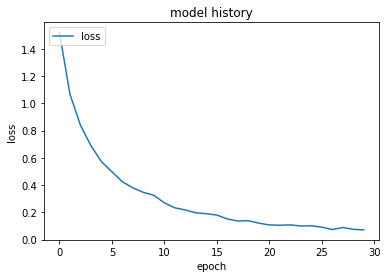

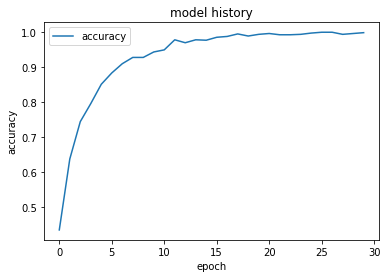

0.44086021184921265
[[ 0  0  2 10  0  1]
 [ 0  0  5 12  0  1]
 [ 0  0  2  5  0  0]
 [ 0  0  1 20  0  0]
 [ 0  0  0  8  0  1]
 [ 0  0  1  5  0 19]]
---------------------------------------------------------------------------
Epoch 1/30
834/834 [==============================] - 8s 10ms/step - loss: 1.5737 - accuracy: 0.3897
Epoch 2/30
834/834 [==============================] - 4s 5ms/step - loss: 1.0781 - accuracy: 0.6463
Epoch 3/30
834/834 [==============================] - 4s 5ms/step - loss: 0.8084 - accuracy: 0.7662
Epoch 4/30
834/834 [==============================] - 4s 5ms/step - loss: 0.6936 - accuracy: 0.7926
Epoch 5/30
834/834 [==============================] - 5s 5ms/step - loss: 0.5543 - accuracy: 0.8597
Epoch 6/30
834/834 [==============================] - 5s 5ms/step - loss: 0.4861 - accuracy: 0.8921
Epoch 7/30
834/834 [==============================] - 5s 5ms/step - loss: 0.4321 - accuracy: 0.9005
Epoch 8/30
834/834 [==============================] - 5s 5ms/step - loss: 0.

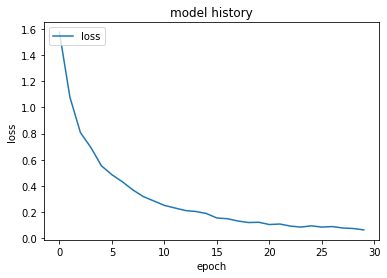

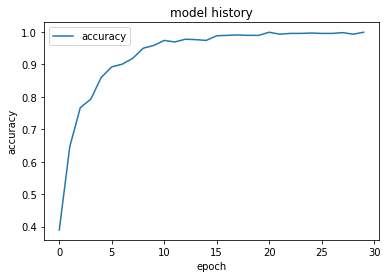

0.4193548262119293
[[ 0  0  2 11  0  1]
 [ 0  0  2 14  0  2]
 [ 0  0  2  5  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  1  7  0  0]
 [ 0  0  1  8  0 16]]
---------------------------------------------------------------------------
Epoch 1/30
834/834 [==============================] - 8s 10ms/step - loss: 1.6203 - accuracy: 0.3873
Epoch 2/30
834/834 [==============================] - 4s 5ms/step - loss: 1.1158 - accuracy: 0.6199
Epoch 3/30
834/834 [==============================] - 4s 5ms/step - loss: 0.8857 - accuracy: 0.6942
Epoch 4/30
834/834 [==============================] - 5s 5ms/step - loss: 0.6895 - accuracy: 0.7938
Epoch 5/30
834/834 [==============================] - 5s 5ms/step - loss: 0.5742 - accuracy: 0.8537
Epoch 6/30
834/834 [==============================] - 5s 5ms/step - loss: 0.5068 - accuracy: 0.8753
Epoch 7/30
834/834 [==============================] - 5s 5ms/step - loss: 0.4383 - accuracy: 0.9041
Epoch 8/30
834/834 [==============================] - 5s 5ms/step - loss: 0.3

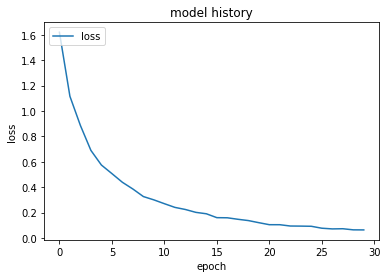

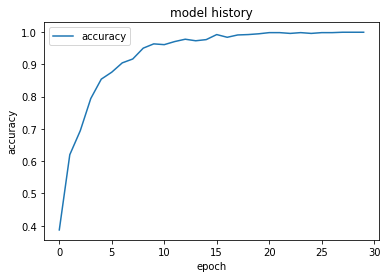

0.40860214829444885
[[ 0  0  0 14  0  0]
 [ 0  0  0 16  0  1]
 [ 0  0  0  8  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  6  0  2]
 [ 0  0  0  8  0 17]]
---------------------------------------------------------------------------
Epoch 1/30
834/834 [==============================] - 8s 10ms/step - loss: 1.6350 - accuracy: 0.3885
Epoch 2/30
834/834 [==============================] - 4s 5ms/step - loss: 1.1461 - accuracy: 0.6079
Epoch 3/30
834/834 [==============================] - 4s 5ms/step - loss: 0.8775 - accuracy: 0.7146
Epoch 4/30
834/834 [==============================] - 4s 5ms/step - loss: 0.7105 - accuracy: 0.7914
Epoch 5/30
834/834 [==============================] - 5s 5ms/step - loss: 0.5958 - accuracy: 0.8405
Epoch 6/30
834/834 [==============================] - 5s 5ms/step - loss: 0.5161 - accuracy: 0.8693
Epoch 7/30
834/834 [==============================] - 5s 5ms/step - loss: 0.4452 - accuracy: 0.9077
Epoch 8/30
834/834 [==============================] - 5s 5ms/step - loss: 0.

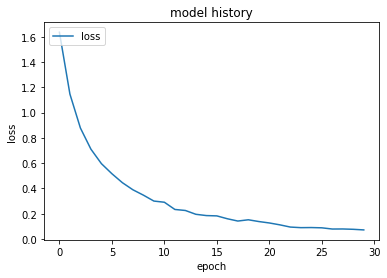

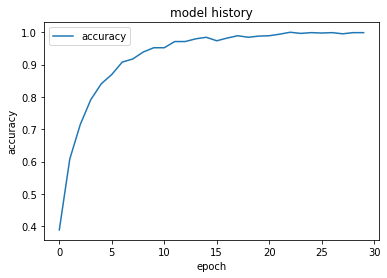

0.3655914068222046
[[ 0  0  1 13  0  0]
 [ 0  0  1 16  0  0]
 [ 0  0  1  6  0  1]
 [ 0  0  0 21  0  0]
 [ 0  0  2  6  0  0]
 [ 0  0  0 13  0 12]]
---------------------------------------------------------------------------
Epoch 1/30
834/834 [==============================] - 8s 10ms/step - loss: 1.6744 - accuracy: 0.3561
Epoch 2/30
834/834 [==============================] - 4s 5ms/step - loss: 1.1346 - accuracy: 0.6139
Epoch 3/30
834/834 [==============================] - 4s 5ms/step - loss: 0.8686 - accuracy: 0.7194
Epoch 4/30
834/834 [==============================] - 4s 5ms/step - loss: 0.7143 - accuracy: 0.7878
Epoch 5/30
834/834 [==============================] - 4s 5ms/step - loss: 0.5897 - accuracy: 0.8501
Epoch 6/30
834/834 [==============================] - 5s 5ms/step - loss: 0.4915 - accuracy: 0.8897
Epoch 7/30
834/834 [==============================] - 5s 5ms/step - loss: 0.4110 - accuracy: 0.8957
Epoch 8/30
834/834 [==============================] - 5s 5ms/step - loss: 0.3

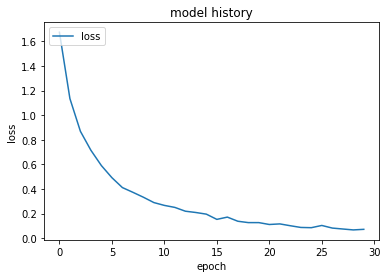

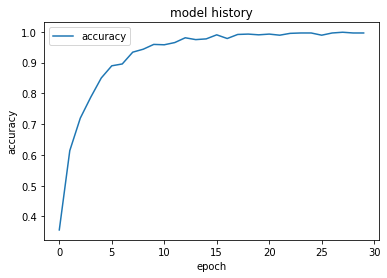

0.3655914068222046
[[ 0  0  0 14  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  6  1  1]
 [ 1  0  0 12  0 12]]
---------------------------------------------------------------------------
Epoch 1/30
834/834 [==============================] - 8s 10ms/step - loss: 1.5933 - accuracy: 0.3837
Epoch 2/30
834/834 [==============================] - 4s 5ms/step - loss: 1.1225 - accuracy: 0.6259
Epoch 3/30
834/834 [==============================] - 4s 5ms/step - loss: 0.8517 - accuracy: 0.7362
Epoch 4/30
834/834 [==============================] - 4s 5ms/step - loss: 0.7045 - accuracy: 0.7854
Epoch 5/30
834/834 [==============================] - 4s 5ms/step - loss: 0.5918 - accuracy: 0.8429
Epoch 6/30
834/834 [==============================] - 5s 5ms/step - loss: 0.5232 - accuracy: 0.8597
Epoch 7/30
834/834 [==============================] - 5s 5ms/step - loss: 0.4545 - accuracy: 0.8849
Epoch 8/30
834/834 [==============================] - 5s 5ms/step - loss: 0.3

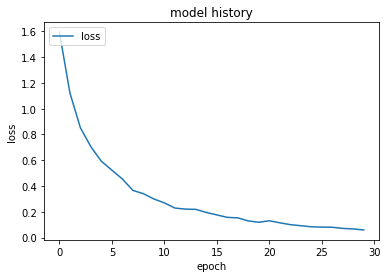

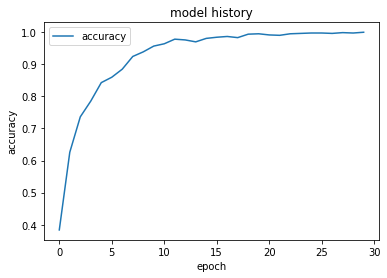

0.32258063554763794
[[ 0  0  4 10  0  0]
 [ 1  0  2 15  0  0]
 [ 0  0  1  7  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  2  6  0  0]
 [ 0  0  5 11  0  8]]
---------------------------------------------------------------------------
Epoch 1/30
834/834 [==============================] - 8s 9ms/step - loss: 1.5991 - accuracy: 0.3885
Epoch 2/30
834/834 [==============================] - 4s 5ms/step - loss: 1.0693 - accuracy: 0.6547
Epoch 3/30
834/834 [==============================] - 4s 5ms/step - loss: 0.8244 - accuracy: 0.7518
Epoch 4/30
834/834 [==============================] - 4s 5ms/step - loss: 0.6532 - accuracy: 0.8369
Epoch 5/30
834/834 [==============================] - 4s 5ms/step - loss: 0.5611 - accuracy: 0.8453
Epoch 6/30
834/834 [==============================] - 4s 5ms/step - loss: 0.4711 - accuracy: 0.9029
Epoch 7/30
834/834 [==============================] - 4s 5ms/step - loss: 0.4119 - accuracy: 0.9125
Epoch 8/30
834/834 [==============================] - 4s 5ms/step - loss: 0.3

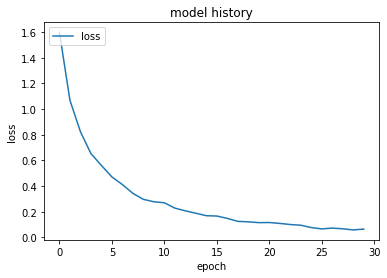

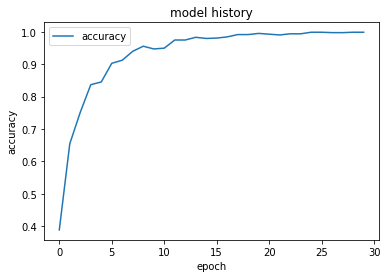

0.3655914068222046
[[ 0  0  3  9  0  1]
 [ 3  0  5 10  0  0]
 [ 0  0  0  7  0  1]
 [ 0  0  0 21  0  0]
 [ 0  0  2  6  0  0]
 [ 0  0  0 12  0 13]]
---------------------------------------------------------------------------
Epoch 1/30
835/835 [==============================] - 10s 11ms/step - loss: 1.7012 - accuracy: 0.3497
Epoch 2/30
835/835 [==============================] - 4s 5ms/step - loss: 1.1245 - accuracy: 0.6240
Epoch 3/30
835/835 [==============================] - 4s 5ms/step - loss: 0.8535 - accuracy: 0.7473
Epoch 4/30
835/835 [==============================] - 4s 5ms/step - loss: 0.6942 - accuracy: 0.7928
Epoch 5/30
835/835 [==============================] - 5s 5ms/step - loss: 0.5876 - accuracy: 0.8347
Epoch 6/30
835/835 [==============================] - 5s 5ms/step - loss: 0.4838 - accuracy: 0.8934
Epoch 7/30
835/835 [==============================] - 5s 5ms/step - loss: 0.4217 - accuracy: 0.9174
Epoch 8/30
835/835 [==============================] - 5s 5ms/step - loss: 0.

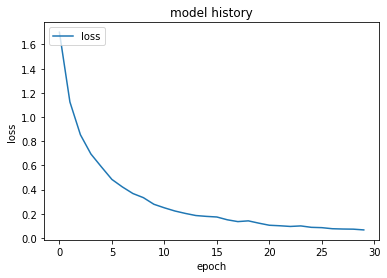

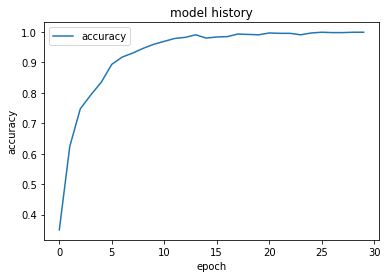

0.45652174949645996
[[ 0  0  0 10  0  3]
 [ 0  0  0 16  0  2]
 [ 0  0  1  6  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  1  7  0  1]
 [ 0  0  0  4  0 21]]
---------------------------------------------------------------------------
Epoch 1/30
835/835 [==============================] - 8s 9ms/step - loss: 1.5684 - accuracy: 0.4132
Epoch 2/30
835/835 [==============================] - 4s 5ms/step - loss: 1.0620 - accuracy: 0.6455
Epoch 3/30
835/835 [==============================] - 4s 5ms/step - loss: 0.8058 - accuracy: 0.7557
Epoch 4/30
835/835 [==============================] - 4s 5ms/step - loss: 0.6598 - accuracy: 0.8228
Epoch 5/30
835/835 [==============================] - 5s 5ms/step - loss: 0.5495 - accuracy: 0.8515
Epoch 6/30
835/835 [==============================] - 5s 5ms/step - loss: 0.4677 - accuracy: 0.8946
Epoch 7/30
835/835 [==============================] - 5s 5ms/step - loss: 0.4034 - accuracy: 0.9126
Epoch 8/30
835/835 [==============================] - 5s 5ms/step - loss: 0.3

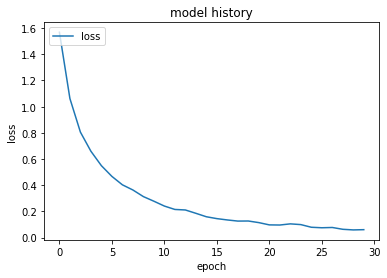

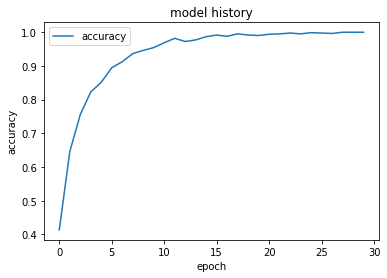

0.3586956560611725
[[ 0  0  1 12  0  0]
 [ 0  0  1 17  0  0]
 [ 0  0  0  7  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  9  0  0]
 [ 0  0  1 11  0 13]]
---------------------------------------------------------------------------
Epoch 1/30
835/835 [==============================] - 8s 10ms/step - loss: 1.7078 - accuracy: 0.3365
Epoch 2/30
835/835 [==============================] - 4s 5ms/step - loss: 1.1332 - accuracy: 0.6263
Epoch 3/30
835/835 [==============================] - 4s 5ms/step - loss: 0.8918 - accuracy: 0.7210
Epoch 4/30
835/835 [==============================] - 4s 5ms/step - loss: 0.7064 - accuracy: 0.8084
Epoch 5/30
835/835 [==============================] - 4s 5ms/step - loss: 0.6235 - accuracy: 0.8216
Epoch 6/30
835/835 [==============================] - 5s 5ms/step - loss: 0.5442 - accuracy: 0.8527
Epoch 7/30
835/835 [==============================] - 5s 5ms/step - loss: 0.4426 - accuracy: 0.8910
Epoch 8/30
835/835 [==============================] - 5s 5ms/step - loss: 0.3

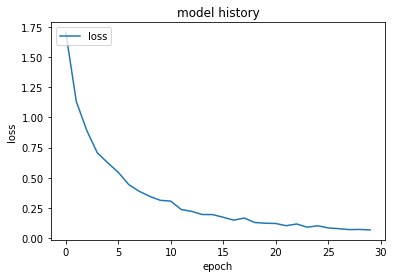

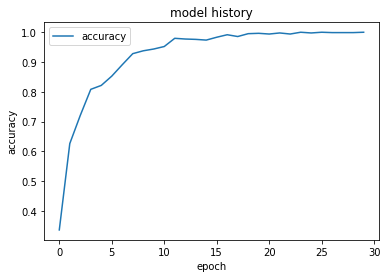

0.45652174949645996
[[ 1  0  0  9  0  3]
 [ 0  0  0 17  0  1]
 [ 0  0  0  4  0  3]
 [ 0  0  0 20  0  0]
 [ 0  0  0  8  0  1]
 [ 0  0  0  4  0 21]]
---------------------------------------------------------------------------


In [19]:
prediction=[]
confusion_list=[]
num_classes = 6
for train_index, test_index in skf.split(img_x,labels):
    x_train, x_test = img_x[train_index,:,:,:], img_x[test_index,:,:,:]
    y_train, y_test = labels[train_index], labels[test_index]
    y_train =to_categorical(y_train, num_classes)
    y_test =to_categorical(y_test, num_classes)
    X,Y=cnn_model(x_train,x_test,y_test,y_train)
    prediction.append(X)
    confusion_list.append(Y)
    print(X)
    print(Y)
    print("---------------------------------------------------------------------------")

In [21]:
print(prediction)

[0.44086021184921265, 0.4193548262119293, 0.40860214829444885, 0.3655914068222046, 0.3655914068222046, 0.32258063554763794, 0.3655914068222046, 0.45652174949645996, 0.3586956560611725, 0.45652174949645996]
